In [1]:
import os
import time as tm
import numpy as np
import pandas as pd
from scHPL import train, predict, evaluate
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

from load_dataset import load_dataset
from mlp_generalized import run_mlp
from cnn_generalized import run_cnn
from onehotencode import onehotencode
from split_dataset import split_dataset
from results import result

import scanpy as sc

In [2]:
adata = sc.read('brain_downsampled5000_integrated.h5ad')
groups = adata.obs.groupby('dataset').indices
TM = adata[groups['TM']]
X = pd.DataFrame(data = TM.X, index = TM.obs_names, columns=TM.var_names)
Y = pd.DataFrame(data = TM.obs['original'].values)[0]
print("shape of data: ", X.shape)
print("shape of labels: ", Y.shape)

shape of data:  (7856, 2000)
shape of labels:  (7856,)


In [3]:
# one hot encode labels
ohe, y_dummy = onehotencode(Y)
print(y_dummy.shape)
# split the data into train, validation and test set
x_tr, y_tr, x_val, y_val, x_train, y_train, x_test, y_test = split_dataset(X, y_dummy)

(7856, 9)
shape of train set:  (6284, 2000)  and labels:  (6284, 9) 

shape of test set:  (1572, 2000)  and labels:  (1572, 9) 

Shape of train and validation set to check for overfitting
shape of train set:  (5655, 2000)  and labels:  (5655, 9) 

shape of validation set:  (629, 2000)  and labels:  (629, 9)


## Linear SVM performance

shape of labels in training set:  (6284,)
shape of labels in test set:  (1572,)
Training time: 5.756255149841309
Predict time: 0.08127498626708984
Accuracy of test set:  0.9860050890585241
F1-score of test set:  0.9862143760940361
Precision of test set: 0.9868150872495237
Recall of test set: 0.9860050890585241
Classification report of test set:
                                      precision    recall  f1-score   support

             Bergmann glial cell-TM       0.64      0.88      0.74         8
astrocyte of the cerebral cortex-TM       0.95      0.95      0.95        87
                  brain pericyte-TM       0.91      1.00      0.95        31
                endothelial cell-TM       1.00      0.98      0.99       143
                      macrophage-TM       0.91      0.83      0.87        12
                 microglial cell-TM       1.00      1.00      1.00       879
                          neuron-TM       0.96      0.95      0.95        56
  oligodendrocyte precursor cell-TM

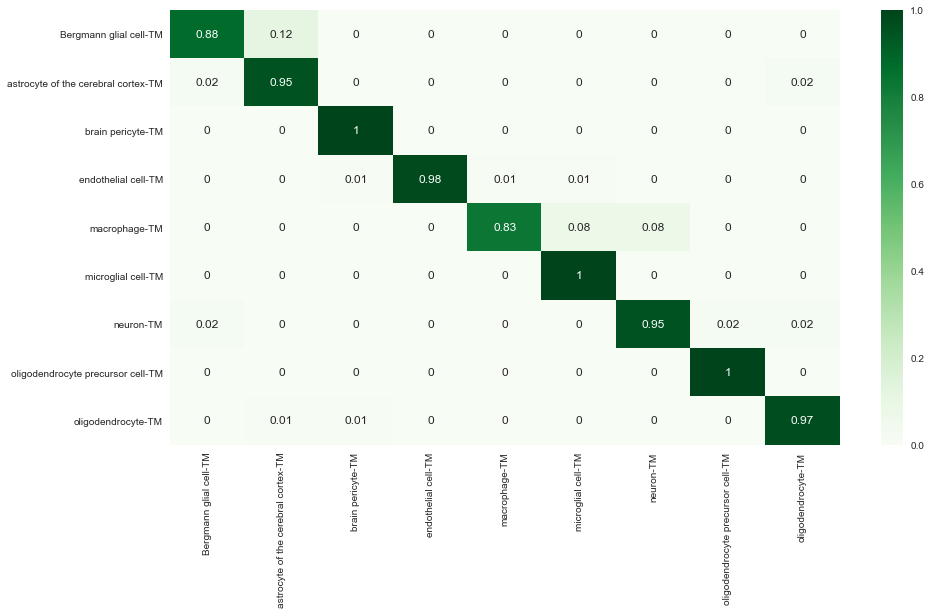

In [4]:
inv_train = ohe.inverse_transform(y_train).ravel()
inv_test = ohe.inverse_transform(y_test).ravel()
print("shape of labels in training set: ", inv_train.shape)
print("shape of labels in test set: ", inv_test.shape)

start = tm.time()
lin_svm = train.svm.LinearSVC()
lin_svm.fit(x_train, inv_train)
training_time = tm.time()-start
print('Training time:', training_time)

start = tm.time()
y_pred = lin_svm.predict(x_test)
test_time = tm.time()-start
print('Predict time:', test_time)

result(inv_test, y_pred)

## MLP performance

Train the model to check for overfitting


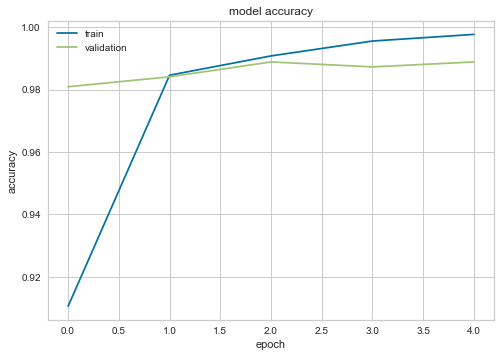

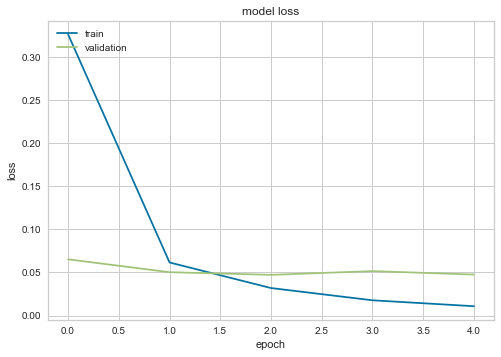

train the final model
Epoch 1/5
197/197 [==============================] - 3s 13ms/step - loss: 0.0099 - accuracy: 0.9975
Epoch 2/5
197/197 [==============================] - 2s 12ms/step - loss: 0.0086 - accuracy: 0.9981
Epoch 3/5
197/197 [==============================] - 2s 13ms/step - loss: 0.0059 - accuracy: 0.9989
Epoch 4/5
197/197 [==============================] - 3s 13ms/step - loss: 0.0036 - accuracy: 0.9990
Epoch 5/5
197/197 [==============================] - 2s 12ms/step - loss: 0.0026 - accuracy: 0.9997
Training time: 12.597872018814087
Predict time: 0.357666015625
The results are as follows:
Accuracy of test set:  0.989821882951654
F1-score of test set:  0.989895584128436
Precision of test set: 0.9902364278756939
Recall of test set: 0.989821882951654
Classification report of test set:
                                      precision    recall  f1-score   support

             Bergmann glial cell-TM       0.88      0.88      0.88         8
astrocyte of the cerebral cortex-T

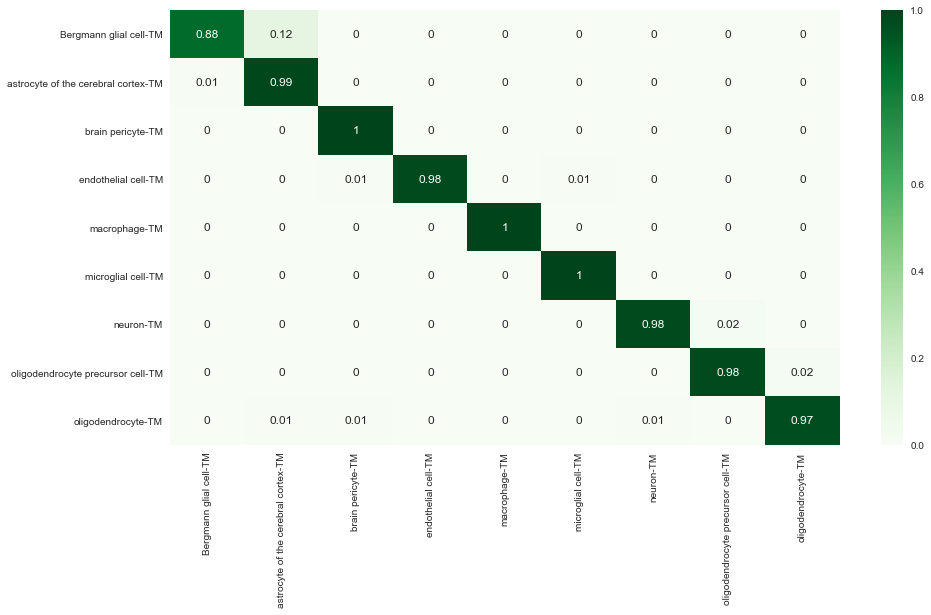

In [4]:
run_mlp(x_tr, y_tr, x_val, y_val, x_train, y_train, x_test, y_test, ohe)

## 1D-CNN performance

Train the model to check for overfitting


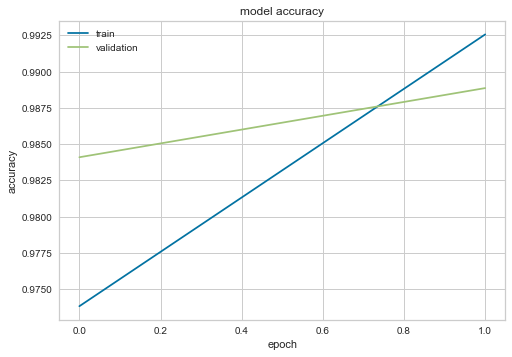

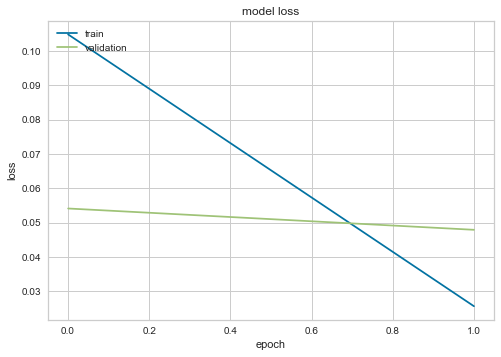

train the final model
Epoch 1/2
197/197 [==============================] - 59s 298ms/step - loss: 0.0149 - accuracy: 0.9955
Epoch 2/2
197/197 [==============================] - 50s 252ms/step - loss: 0.0072 - accuracy: 0.9981
Training time: 108.7407021522522
Predict time: 2.440556049346924
The results are as follows:
Accuracy of test set:  0.9910941475826972
F1-score of test set:  0.9911704848950506
Precision of test set: 0.9913952609817714
Recall of test set: 0.9910941475826972
Classification report of test set:
                                      precision    recall  f1-score   support

             Bergmann glial cell-TM       0.78      0.88      0.82         8
astrocyte of the cerebral cortex-TM       0.95      0.95      0.95        87
                  brain pericyte-TM       0.91      1.00      0.95        31
                endothelial cell-TM       0.99      0.99      0.99       143
                      macrophage-TM       1.00      1.00      1.00        12
                 

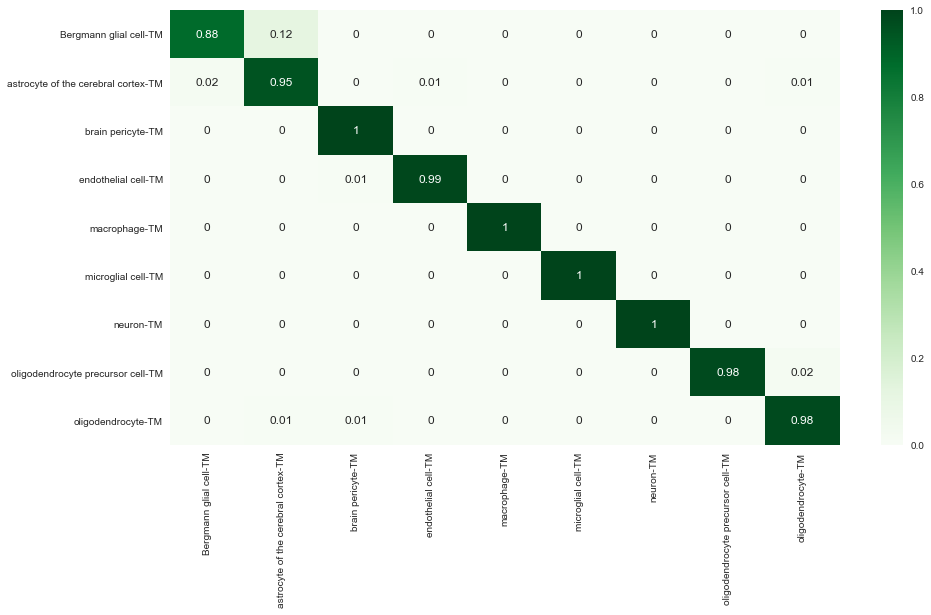

In [5]:
x_tr = np.expand_dims(x_tr,axis=-1)
x_val = np.expand_dims(x_val,axis=-1)
x_test = np.expand_dims(x_test,axis=-1)
x_train = np.expand_dims(x_train,axis=-1)
run_cnn(x_tr, y_tr, x_val, y_val, x_train, y_train, x_test, y_test, ohe)